In [2]:
import xarray as xr
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np

In [3]:
import wget
pr_url = 'https://nextcloud.dkrz.de/s/fMRFxoqdGs2S9W3/download?path=%2F&files=pr_day_MPI-ESM-LR_historical_r1i1p1_19500101-19591231.nc'
wget.download(pr_url)

'pr_day_MPI-ESM-LR_historical_r1i1p1_19500101-19591231.nc'

In [40]:
ds = xr.open_dataset('pr_day_MPI-ESM-LR_historical_r1i1p1_19500101-19591231.nc')
ds

<xarray.Dataset>
Dimensions:    (bnds: 2, lat: 96, lon: 192, time: 3652)
Coordinates:
  * time       (time) datetime64[ns] 1950-01-01T12:00:00 ... 1959-12-31T12:00:00
  * lat        (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 84.86 86.72 88.57
  * lon        (lon) float64 0.0 1.875 3.75 5.625 ... 352.5 354.4 356.2 358.1
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] ...
    lat_bnds   (lat, bnds) float64 ...
    lon_bnds   (lon, bnds) float64 ...
    pr         (time, lat, lon) float32 ...
Attributes:
    institution:            Max Planck Institute for Meteorology
    institute_id:           MPI-M
    experiment_id:          historical
    source:                 MPI-ESM-LR 2011; URL: http://svn.zmaw.de/svn/cosm...
    model_id:               MPI-ESM-LR
    forcing:                GHG Oz SD Sl Vl LU
    parent_experiment_id:   piControl
    parent_experiment_rip:  r1i1p1
    branch_time:            10957.0
    contact:                c

In [42]:
ds['pr']

<xarray.DataArray 'pr' (time: 3652, lat: 96, lon: 192)>
[67313664 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1950-01-01T12:00:00 ... 1959-12-31T12:00:00
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             kg m-2 s-1
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-05-28T00:59:20Z altered by CMOR: replaced missing...
    associated_files:  baseURL: http://cmip-pcmdi.llnl.gov/CMIP5/dataLocation...

In [44]:
clim  = ds['pr'].mean('time', keep_attrs=True)
clim 

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[1.878073e-06, 1.884778e-06, 1.891023e-06, ..., 1.858726e-06,
        1.864111e-06, 1.870606e-06],
       [2.073080e-06, 2.038709e-06, 2.045903e-06, ..., 2.082568e-06,
        2.089814e-06, 2.109579e-06],
       [2.516071e-06, 2.418443e-06, 2.317629e-06, ..., 2.748493e-06,
        2.630142e-06, 2.540282e-06],
       ...,
       [9.318755e-06, 9.197121e-06, 9.058885e-06, ..., 9.412687e-06,
        9.333458e-06, 9.263494e-06],
       [8.472719e-06, 8.666871e-06, 8.781532e-06, ..., 8.100419e-06,
        8.267638e-06, 8.427414e-06],
       [6.366225e-06, 6.352013e-06, 6.327969e-06, ..., 6.402202e-06,
        6.401124e-06, 6.413309e-06]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at s

In [47]:
clim.data = clim.data * 86400
clim.attrs['units'] = 'mm/day' 

print(clim)

<xarray.DataArray 'pr' (lat: 96, lon: 192)>
array([[0.162266, 0.162845, 0.163384, ..., 0.160594, 0.161059, 0.16162 ],
       [0.179114, 0.176144, 0.176766, ..., 0.179934, 0.18056 , 0.182268],
       [0.217389, 0.208953, 0.200243, ..., 0.23747 , 0.227244, 0.21948 ],
       ...,
       [0.80514 , 0.794631, 0.782688, ..., 0.813256, 0.806411, 0.800366],
       [0.732043, 0.748818, 0.758724, ..., 0.699876, 0.714324, 0.728129],
       [0.550042, 0.548814, 0.546737, ..., 0.55315 , 0.553057, 0.55411 ]])
Coordinates:
  * lat      (lat) float64 -88.57 -86.72 -84.86 -83.0 ... 83.0 84.86 86.72 88.57
  * lon      (lon) float64 0.0 1.875 3.75 5.625 7.5 ... 352.5 354.4 356.2 358.1
Attributes:
    standard_name:     precipitation_flux
    long_name:         Precipitation
    comment:           at surface; includes both liquid and solid phases from...
    units:             mm/day
    cell_methods:      time: mean
    cell_measures:     area: areacella
    history:           2011-05-28T00:59:20Z altere

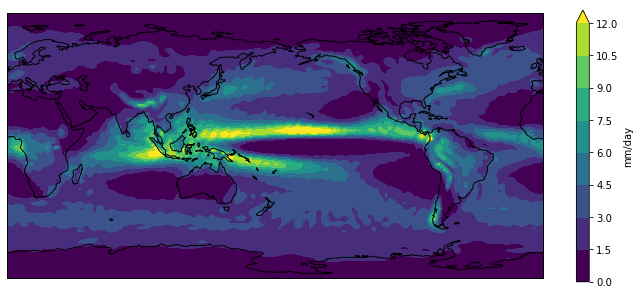

In [55]:
%matplotlib inline
fig = plt.figure(figsize=[12, 5])

ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))

clim.plot.contourf(ax=ax,
                  levels=np.arange(0, 13.5, 1.5),
                  extend='max',
                  transform=ccrs.PlateCarree(),
                  cbar_kwargs={'label': clim.units})
ax.coastlines()


plt.show()